In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [6]:
#MODEL = "0110"

MODEL = "0144"

PATH = "aorta_outlet"
#PATH  = "right_iliac_outlet"
#PATH  = "aorta"
#PATH  = "right_iliac"

CASE  = "sim_wom_rcr_real"

mesh  = "coarse"

gen   = 3

quants   = [
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

models   = list(range(50))
dt       = 0.01

CSV    = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+'/'+PATH+".csv"
                    
OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/"+str(gen)+"/"+PATH
io.mkdir(OUTPUT)
OUTPUT = OUTPUT+'/'+mesh
io.mkdir(OUTPUT)

df = pd.read_csv(CSV)
df = df.loc[df['mesh']==mesh]
df = df.loc[df['generation'] == gen]

points = df['point'].unique()
print(points)

[0]


No handles with labels found to put in legend.


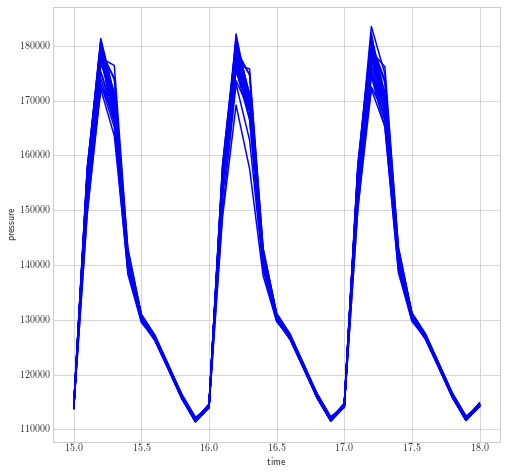

No handles with labels found to put in legend.


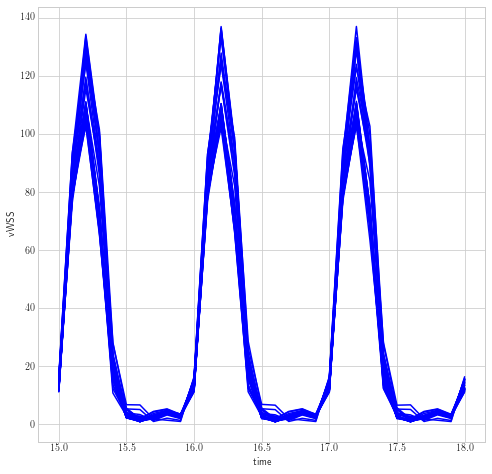

No handles with labels found to put in legend.


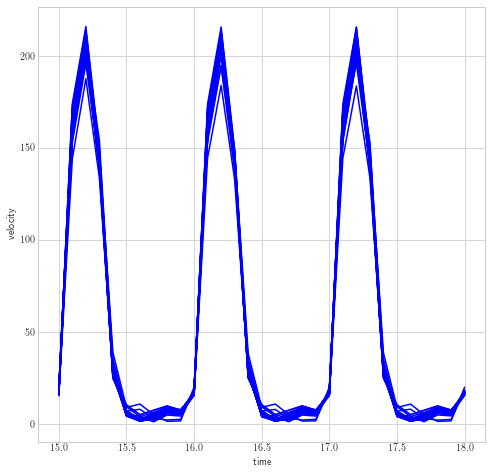

In [7]:
for po in points:
    for q in quants:
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['point']==po)]

            if data.shape[0] == 0: continue

            y = data[q].values
            x = data['time'].values*dt

            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)

        label = q.split('_')[0]

        plt.figure(figsize=(8,8))
        plt.plot(X.T,Y.T, color='b')
        plt.xlabel("time")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/{}.{}.png'.format(q,po),dpi=300)
        plt.savefig(OUTPUT+'/{}.{}.pdf'.format(q,po),dpi=200)

        plt.show()
        plt.close()

No handles with labels found to put in legend.


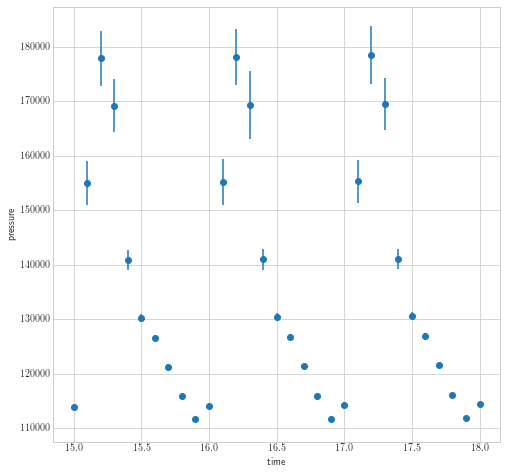

No handles with labels found to put in legend.


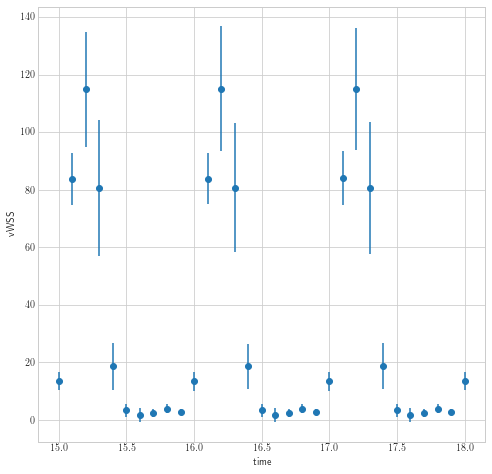

No handles with labels found to put in legend.


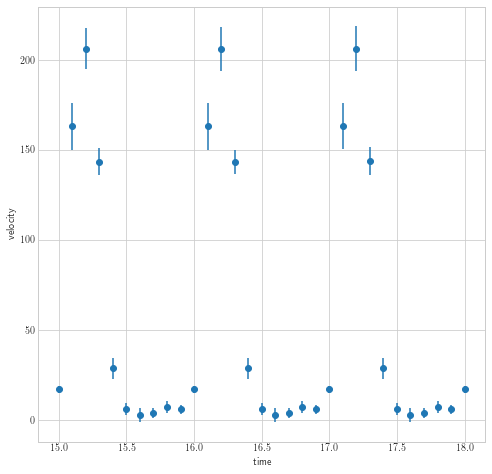

In [8]:
for po in points:
    for q in quants:
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['point']==po)]
            if data.shape[0] == 0: continue
            y = data[q].values
            x = data['time'].values*dt

            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)

        mu  = np.mean(Y,axis=0)
        std = np.std(Y,axis=0)*2

        label = q.split('_')[0]

        plt.figure(figsize=(8,8))
        plt.errorbar(x,y=mu, yerr=std, fmt='o')
        plt.xlabel("time")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/{}.{}_err.png'.format(q,po),dpi=300)
        plt.savefig(OUTPUT+'/{}.{}_err.pdf'.format(q,po),dpi=200)

        plt.show()
        plt.close()

No handles with labels found to put in legend.


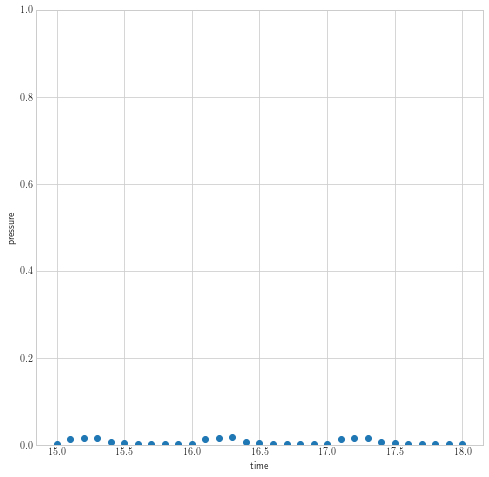

No handles with labels found to put in legend.


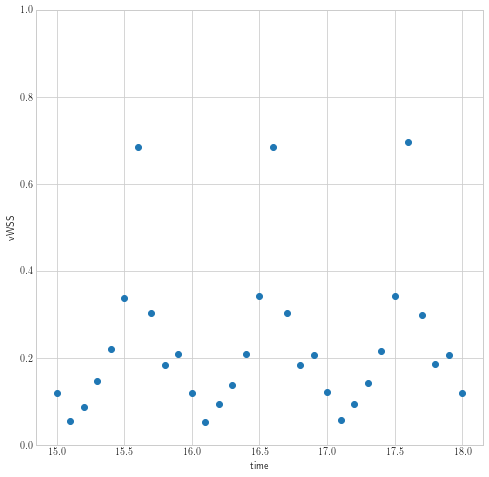

No handles with labels found to put in legend.


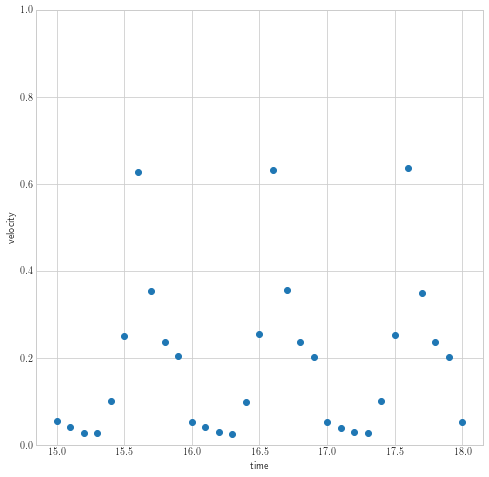

In [9]:
for po in points:
    for q in quants:
        series_x = []
        series_y = []
        for m in models:
            data = df.loc[(df['model'] == m) & (df['point'] == po)]
            if data.shape[0] == 0: continue
            y = data[q].values
            x = data['time'].values*dt

            series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        X = np.array(series_x)

        mu  = np.mean(Y,axis=0)
        std = np.std(Y,axis=0)
        std_rel = std/mu
        label = q.split('_')[0]

        plt.figure(figsize=(8,8))
        plt.plot(x,std_rel,marker='o',linestyle='')
        plt.xlabel("time")
        plt.ylabel(label)
        plt.ylim(0,1)
        plt.legend()
        plt.savefig(OUTPUT+'/{}.{}_std.png'.format(q,po),dpi=300)
        plt.savefig(OUTPUT+'/{}.{}_std.pdf'.format(q,po),dpi=200)

        plt.show()
        plt.close()